In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import tensorflow_text as text
import tensorflow_hub as hub

import platform
import time
import pathlib
import os

In [32]:
recipes=pd.read_csv('newresults.csv')

In [33]:
recipes.dropna(inplace=True)
recipes

,title,ingredients,recipe,category
0,Traditional Osso Buco,"2 pounds veal shanks, cut into short lengths ,...",Dust the veal shanks lightly with flour. Melt ...,Main Dishes
1,Italian Sausage Soup with Tortellini,"1 pound sweet Italian sausage, casings removed...","In a 5-quart Dutch oven, brown sausage. Remove...",Vegetable Soup Recipes
2,"Italian Sausage, Peppers, and Onions","6 (4 ounce) links sweet Italian sausage ,2 tab...",Place the sausage in a large skillet over medi...,Sausage
3,Tender Italian Baked Chicken,"¾ cup mayonnaise ,½ cup grated Parmesan cheese...",Preheat oven to 425 degrees F (220 degrees C)....,Italian
4,Easy Pizza Sauce I,"1 (6 ounce) can tomato paste ,1 ½ cups water ,...","Mix together the tomato paste, water, and oliv...",Pizza Sauce Recipes
...,...,...,...,...
10806,Vegetarian Pad Thai,"1 (6.75 ounce) package thin rice noodles ,2 ta...",Place noodles in a heatproof bowl and cover wi...,Thai
10807,Quick and Easy Thai Style Coleslaw,"1 (16 ounce) package shredded coleslaw mix ,¼ ...",Pour the coleslaw mix into a large bowl. Pour ...,No Mayo
10808,Sukhothai Pad Thai,"½ cup white sugar ,½ cup distilled white vineg...",To prepare Pad Thai sauce: In a medium saucepa...,Thai
10809,Slow Cook Thai Chicken,"6 skinless, boneless chicken breast halves - c...","Place the chicken breast strips, bell pepper a...",Thai


In [34]:
recipes.iloc[76
            ]

title                                               Tahini Salad
ingredients    2 pickle-size Persian cucumbers, diced ,1 larg...
recipe         Combine the cucumber, tomato, and radish in a ...
category                                  Cucumber Salad Recipes
Name: 77, dtype: object

In [35]:
title_marker='Title: \n'
ingredients_marker='Ingredients: \n'
instructions_marker='Instructions: \n'

def df_to_string(recipe):
    title=recipe['title'] + '\n\n'
    ingredients=recipe['ingredients']
    instructions=recipe['recipe']
    instructions=instructions.replace('\n', '')
    
    #seperate the ingredients by comma
    ingredients=ingredients.split(',')
    instructions=instructions.split('.')
    
    #add the title marker and the title of the recipe to the return string
    return_string=title_marker + title +ingredients_marker
    
    for ingredient in ingredients:
        return_string += f'▪︎ {ingredient}\n'
        
    return_string+='\n\n'+instructions_marker
    
    for instruction in instructions:
        return_string+=f'▪︎ {instruction}.\n'
    return return_string
        
        
    
    
    
    

In [36]:
#print(df_to_string(recipes.iloc[76]))

In [37]:
recipes_string_list=[]
for i in range(recipes['title'].size):
    recipes_string_list.append(df_to_string(recipes.iloc[i]))


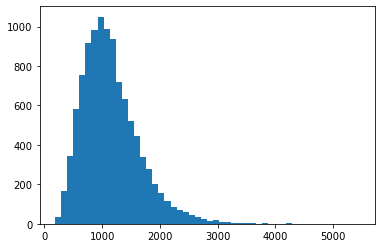

In [38]:
#look at the distribution of recipe lengths to determine a good legth cutoff
recipes_lengths = []
for recipe_text in recipes_string_list:
    recipes_lengths.append(len(recipe_text))

plt.hist(recipes_lengths, bins=50)
plt.show()

In [39]:
#remove all recipes that are longer than 2000 chars in length
recipes_string_list=list(filter(lambda string: len(string)<2000, recipes_string_list))

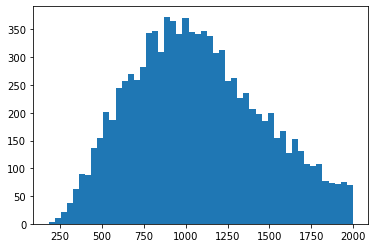

In [40]:
#reinspect our recipe legths after our filtering step
recipes_lengths = []
for recipe_text in recipes_string_list:
    recipes_lengths.append(len(recipe_text))

plt.hist(recipes_lengths, bins=50)
plt.show()

In [41]:
#print(recipes_string_list[1])

In [42]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    char_level=True,
    filters='',
    lower=False,
    split=''
)


In [43]:
tokenizer.fit_on_texts(recipes_string_list)

In [44]:
#tokenizer.get_config()

In [45]:
number_of_recipes=len(recipes_string_list)
number_of_recipes

9937

In [46]:
vectorized_recipes=tokenizer.texts_to_sequences(recipes_string_list)

In [47]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [48]:
padded_vectorized_recipes=pad_sequences(vectorized_recipes, padding="post", truncating="post")

In [49]:
for recipe_index, recipe in enumerate(padded_vectorized_recipes[:10]):
    print('Recipe #{} length: {}'.format(recipe_index + 1, len(recipe)))


Recipe #1 length: 1999
Recipe #2 length: 1999
Recipe #3 length: 1999
Recipe #4 length: 1999
Recipe #5 length: 1999
Recipe #6 length: 1999
Recipe #7 length: 1999
Recipe #8 length: 1999
Recipe #9 length: 1999
Recipe #10 length: 1999


In [50]:
dataset = tf.data.Dataset.from_tensor_slices(padded_vectorized_recipes)
dataset

<TensorSliceDataset shapes: (1999,), types: tf.int32>

## The hell is this doing?????

In [51]:
for recipe in dataset.take(1):
    print('Raw recipe:\n', recipe.numpy(), '\n\n\n')
    print('Stringified recipe:\n')
    #print(type(recipe.numpy()))
    
    print(tokenizer.sequences_to_texts([recipe.numpy()])[0])

Raw recipe:
 [40  7  4 ...  0  0  0] 



Stringified recipe:

T i t l e :   
 T r a d i t i o n a l   O s s o   B u c o 
 
 I n g r e d i e n t s :   
 ▪ ︎   2   p o u n d s   v e a l   s h a n k s 
 ▪ ︎     c u t   i n t o   s h o r t   l e n g t h s   
 ▪ ︎   ¼   c u p   a l l - p u r p o s e   f l o u r   
 ▪ ︎   ¼   c u p   B u t t e r   
 ▪ ︎   2   c l o v e s   g a r l i c 
 ▪ ︎     c r u s h e d   
 ▪ ︎   1   l a r g e   o n i o n 
 ▪ ︎     c h o p p e d   
 ▪ ︎   1   l a r g e   c a r r o t 
 ▪ ︎     c h o p p e d   
 ▪ ︎   ⅔   c u p   d r y   w h i t e   w i n e   
 ▪ ︎   ⅔   c u p   b e e f   s t o c k   
 ▪ ︎   1   ( 1 4 . 5   o u n c e )   c a n   d i c e d   t o m a t o e s   
 ▪ ︎     s a l t   a n d   p e p p e r   t o   t a s t e   
 ▪ ︎   ½   c u p   c h o p p e d   f r e s h   f l a t   l e a f   p a r s l e y   
 ▪ ︎   1   c l o v e   g a r l i c 
 ▪ ︎     m i n c e d   
 ▪ ︎   2   t e a s p o o n s   g r a t e d   l e m o n   z e s t   
 
 
 I n s t r u c t i o n s 

In [52]:
def split_target(recipe):
    input_text = recipe[:-1]
    target_text = recipe[1:]
    
    return input_text, target_text

dataset_targeted = dataset.map(split_target)

In [53]:
dataset_targeted

<MapDataset shapes: ((1998,), (1998,)), types: (tf.int32, tf.int32)>

In [54]:
char_count = len(tokenizer.word_counts) + 1

In [55]:
char_count

108

In [56]:
# Batch size.
BATCH_SIZE = 64

# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
SHUFFLE_BUFFER_SIZE = 1000

dataset_train = dataset_targeted.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).repeat()

In [58]:
ulmfit = hub.load('https://tfhub.dev/edrone/ulmfit/en/sp35k_cased/1')
sents = tf.constant(['All human beings are born free and equal in dignity and rights.',
                     'They are endowed with reason and conscience and should act towards '\
                     'one another in a spirit of brotherhood.'], dtype=tf.string)
encoder = hub.KerasLayer(ulmfit.signatures['string_encoder'], trainable=True)
encoder_vectors = encoder(sents)


{'output_rows': <tf.Tensor: shape=(3,), dtype=int64, numpy=array([ 0, 15, 37])>, 'output_flat': <tf.Tensor: shape=(37, 400), dtype=float32, numpy=
array([[-0.06846654,  0.03071258,  0.04870526, ...,  0.04809857,
         0.15923296, -0.02486313],
       [-0.13043487, -0.1909394 , -0.09320115, ..., -0.1424475 ,
         0.13983175,  0.00967816],
       [ 0.15335041, -0.40955257,  0.5128573 , ..., -0.16427836,
        -0.02573418, -0.40563574],
       ...,
       [-0.02794354,  0.09732353,  0.10050512, ..., -0.1393982 ,
        -0.16106687, -0.13645022],
       [-0.15928333, -0.06271838,  0.23366177, ..., -0.05935495,
         0.09020575, -0.2322308 ],
       [ 0.01761356, -0.01679656,  0.06662259, ...,  0.03510036,
        -0.15061517, -0.08671113]], dtype=float32)>}


In [57]:
base_model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=char_count, output_dim=256,batch_input_shape=[BATCH_SIZE, None]),
    tf.keras.layers.LSTM(units=1024,return_sequences=True,
                         recurrent_initializer=tf.keras.initializers.GlorotNormal()),
    tf.keras.layers.Dense(char_count)
    
])


In [28]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 256)           27648     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 108)           110700    
                                                                 
Total params: 5,385,324
Trainable params: 5,385,324
Non-trainable params: 0
_________________________________________________________________


In [41]:
base_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              optimizer = "adam")

In [ ]:
history=base_model.fit(
    x=dataset_train,
    epochs=50,
    steps_per_epoch=1000
)